# Phase 4 Code Challenge Review

# Load Pakages

In [43]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.sentiment import SentimentIntensityAnalyzer


import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
import matplotlib.pyplot as plt
import string
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import nltk

# Load Data Frame

In [50]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

In [51]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [52]:
df.shape

(9093, 3)

In [53]:
df.tail

<bound method NDFrame.tail of                                              tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...                  

# Review Tweets

In [18]:
tweet = df.loc[10].tweet_text

In [8]:
df.loc[10].emotion_in_tweet_is_directed_at

'Android'

In [9]:
df.loc[10].is_there_an_emotion_directed_at_a_brand_or_product

'Positive emotion'

In [10]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [22]:
tweet = df['tweet_text']
tweet

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: tweet_text, Length: 9093, dtype: object

# Tokenize

In [93]:
df['tweet_text'] = df['tweet_text'].astype(str)

In [94]:
df['tokenized_tweet'] = df['tweet_text'].apply(lambda x: word_tokenize(x))

In [95]:
print(df['tokenized_tweet'])

0       [., @, wesley83, I, have, a, 3G, iPhone, ., Af...
1       [@, jessedee, Know, about, @, fludapp, ?, Awes...
2       [@, swonderlin, Can, not, wait, for, #, iPad, ...
3       [@, sxsw, I, hope, this, year, 's, festival, i...
4       [@, sxtxstate, great, stuff, on, Fri, #, SXSW,...
                              ...                        
9088           [Ipad, everywhere, ., #, SXSW, {, link, }]
9089    [Wave, ,, buzz, ..., RT, @, mention, We, inter...
9090    [Google, 's, Zeiger, ,, a, physician, never, r...
9091    [Some, Verizon, iPhone, customers, complained,...
9092    [Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT,...
Name: tokenized_tweet, Length: 9093, dtype: object


In [96]:
# Step 1: Tokenization
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [104]:
# # Step 1: Tokenization
# def tokenize_text(text):
#     # Split the text into tokens using a regular expression pattern
#     tokens = re.findall(r'\b\w+\b', text)
#     return tokens

In [105]:
# Step 2: Stopword Removal
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

In [106]:
# Step 3: Lemmatization
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

In [99]:
# Step 4: Remove odd special characters
def clean_tokens(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

In [107]:
# Apply preprocessing steps to the 'tweet' column
df['tweet_text'] = df['tweet_text'].astype(str)
df['tokenized_tweet'] = df['tweet_text'].apply(clean_tokens)
df['tokenized_tweet'] = df['tokenized_tweet'].apply(tokenize_text)
df['tokenized_tweet'] = df['tokenized_tweet'].apply(remove_stopwords)
df['tokenized_tweet'] = df['tokenized_tweet'].apply(lemmatize_tokens)


In [108]:
# Print preprocessed tweets
for i, tokens in enumerate(df['tokenized_tweet']):
    print(f"Document {i+1}:")
    print(tokens)

Document 1:
['wesley83', '3G', 'iPhone', '3', 'hr', 'tweeting', 'RISEAustin', 'dead', 'need', 'upgrade', 'Plugin', 'station', 'SXSW']
Document 2:
['jessedee', 'Know', 'fludapp', 'Awesome', 'iPadiPhone', 'app', 'youll', 'likely', 'appreciate', 'design', 'Also', 'theyre', 'giving', 'free', 'Ts', 'SXSW']
Document 3:
['swonderlin', 'wait', 'iPad', '2', 'also', 'sale', 'SXSW']
Document 4:
['sxsw', 'hope', 'year', 'festival', 'isnt', 'crashy', 'year', 'iPhone', 'app', 'sxsw']
Document 5:
['sxtxstate', 'great', 'stuff', 'Fri', 'SXSW', 'Marissa', 'Mayer', 'Google', 'Tim', 'OReilly', 'tech', 'booksconferences', 'amp', 'Matt', 'Mullenweg', 'Wordpress']
Document 6:
['teachntech00', 'New', 'iPad', 'Apps', 'SpeechTherapy', 'Communication', 'Showcased', 'SXSW', 'Conference', 'httphtly49n4M', 'iear', 'edchat', 'asd']
Document 7:
['nan']
Document 8:
['SXSW', 'starting', 'CTIA', 'around', 'corner', 'googleio', 'hop', 'skip', 'jump', 'good', 'time', 'android', 'fan']
Document 9:
['Beautifully', 'smart',

In [109]:
# Create a frequency distribution of tokens
all_tokens = [token for tokens in df['tokenized_tweet'] for token in tokens]
freq_dist = nltk.FreqDist(all_tokens)

# Sort tokens by their frequency in descending order
sorted_tokens = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

# Print the tokens and their counts
for token, count in sorted_tokens:
    print(f"{token}: {count}")
    
df_tokens = pd.DataFrame(sorted_tokens, columns=['Token', 'Count'])

mention: 7051
SXSW: 4771
sxsw: 4535
link: 4291
RT: 2916
iPad: 2093
Google: 1894
Apple: 1765
iPhone: 1298
2: 1145
store: 1076
Austin: 895
amp: 722
app: 627
new: 565
Circles: 559
New: 519
popup: 461
google: 443
Android: 434
Store: 425
via: 416
line: 388
apple: 380
Social: 379
launch: 360
get: 328
today: 328
party: 314
Launch: 312
Network: 311
Called: 280
like: 278
one: 278
free: 273
iPad2: 273
Major: 269
time: 263
social: 262
ipad: 251
Today: 242
Im: 240
u: 232
Possibly: 231
temporary: 229
day: 219
downtown: 216
open: 214
sxswi: 209
need: 206
people: 205
w: 203
opening: 203
Mayer: 198
mobile: 196
see: 189
know: 185
Marissa: 180
iphone: 180
App: 179
ipad2: 179
going: 175
Googles: 175
win: 174
go: 168
apps: 166
dont: 162
year: 160
say: 160
network: 159
set: 157
SxSW: 154
product: 152
make: 149
map: 147
want: 142
panel: 142
user: 141
great: 138
Mobile: 138
think: 136
talk: 132
come: 131
pop: 131
tech: 130
next: 129
android: 128
got: 128
show: 126
4: 126
session: 121
search: 119
thing: 118
s

In [110]:
# Save DataFrame to Excel
output_file = 'token_counts.xlsx'  # Specify the desired output file name
df_tokens.to_excel(output_file, index=False)

print(f"Token counts saved to {output_file}.")

Token counts saved to token_counts.xlsx.


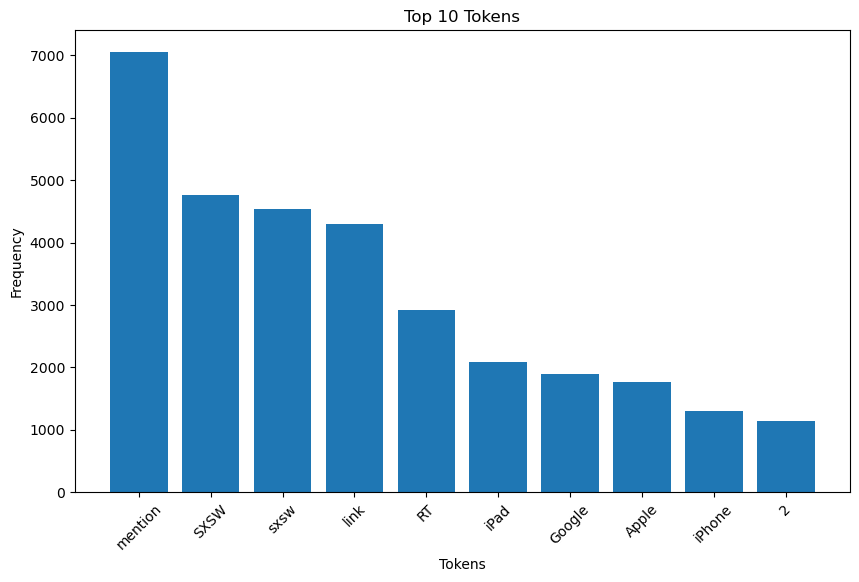

In [111]:
all_tokens = [token for tokens in df['tokenized_tweet'] for token in tokens]
freq_dist = FreqDist(all_tokens)

# Get the top 10 most common tokens
top_tokens = freq_dist.most_common(10)

# Extract the tokens and frequencies
tokens = [token for token, _ in top_tokens]
frequencies = [freq for _, freq in top_tokens]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(tokens, frequencies)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 10 Tokens')
plt.xticks(rotation=45)
plt.show()

In [112]:
df['tokenized_tweet'].head()

0    [wesley83, 3G, iPhone, 3, hr, tweeting, RISEAu...
1    [jessedee, Know, fludapp, Awesome, iPadiPhone,...
2        [swonderlin, wait, iPad, 2, also, sale, SXSW]
3    [sxsw, hope, year, festival, isnt, crashy, yea...
4    [sxtxstate, great, stuff, Fri, SXSW, Marissa, ...
Name: tokenized_tweet, dtype: object

# Needed Clean-up

1) Tokenization 
- In natural language processing (NLP), tokenization is the process of breaking down a text document into smaller units called tokens. A token can be thought of as a meaningful unit of text, which could be a word, a group of characters, or even a sentence.

- Tokenization plays a crucial role in NLP because many subsequent NLP tasks, such as text classification, sentiment analysis, or machine translation, rely on the understanding and analysis of individual tokens. Here are a few key points about tokenization:

- Word tokenization: The most common form of tokenization is word tokenization, where the text is split into individual words. For example, the sentence "I love NLP" would be tokenized into the three tokens: ['I', 'love', 'NLP'].

- Tokenization considerations: Tokenization should handle various considerations, such as handling punctuation marks, contractions, special characters, and different languages. It may involve handling hyphenated words, abbreviations, or preserving specific patterns.

- Tokenization libraries: There are several popular libraries in Python that provide built-in tokenization capabilities, such as NLTK (Natural Language Toolkit), SpaCy, and the tokenization module in the Hugging Face's Transformers library.

- Tokenization techniques: Tokenization techniques can vary depending on the specific requirements of the task. Some common techniques include rule-based tokenization, statistical tokenization, regular expression-based tokenization, or pre-trained models.

- Sentence tokenization: In addition to word tokenization, sentence tokenization is also essential. It involves splitting the text into individual sentences. Sentence tokenization is useful for tasks such as machine translation, text summarization, or extracting key information from the text.

- Specialized tokenization: In some cases, tokenization may go beyond words and sentences. For example, in the case of named entity recognition, specialized tokenization might be performed to identify and classify specific entities like names, locations, dates, or organizations.

- Overall, tokenization is a fundamental step in NLP, allowing us to break down text into meaningful units for further analysis, modeling, and processing. It provides the foundation for a wide range of NLP tasks and enables the extraction of information and patterns from text data.

2) Make Lowercase

2) Remove Punctuation

3) Remove Stop words

4) Maybe remove Roman Numerals?

# Tokenize Text for Sentiment Analysis and Subject Extraction

- To tokenize text for sentiment analysis and subject extraction, it's recommended to use a combination of word tokenization and part-of-speech (POS) tagging. Here's a suggested approach:

- Word Tokenization: Start by performing word tokenization to split the text into individual words. This can be achieved using libraries such as NLTK, SpaCy, or the tokenization module in the Hugging Face's Transformers library. Word tokenization will break down the text into meaningful word tokens, which will serve as the basic units for analysis.

- Part-of-Speech Tagging: Once you have tokenized the text into words, apply part-of-speech tagging to assign grammatical tags to each word token. Part-of-speech tagging categorizes words into specific grammatical categories such as nouns, verbs, adjectives, adverbs, and so on. This information is valuable for understanding the structure and context of the text.

- Sentiment Analysis: For sentiment analysis, you can utilize the word tokens and their associated part-of-speech tags to analyze sentiment. Consider using sentiment lexicons or pre-trained sentiment analysis models that take into account the sentiment orientation of different parts of speech. For example, certain adjectives or adverbs may carry stronger sentiment than others. By considering the part-of-speech tags during sentiment analysis, you can enhance the accuracy of sentiment predictions.

- Subject Extraction: To extract subjects or topics from the text, you can leverage the part-of-speech tags to identify nouns and noun phrases. Nouns often represent the subjects or main topics of a sentence or text. By focusing on the noun tokens, along with their associated adjectives or modifiers, you can extract the primary subjects or topics discussed in the text.

- By combining word tokenization with part-of-speech tagging, you can capture the sentiment and extract subjects or topics from the text more effectively. This approach allows you to consider the role of different parts of speech in sentiment analysis and subject extraction, leading to a more nuanced understanding of the text.


In [36]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag

# Convert values in 'tweet_text' column to strings
df['tweet_text'] = df['tweet_text'].astype(str)

# Tokenize the text into sentences
df['sentences'] = df['tweet_text'].apply(sent_tokenize)

# Tokenize each sentence into words
df['tokenized_sentences'] = df['sentences'].apply(lambda x: [word_tokenize(sentence) for sentence in x])

# Perform POS tagging on the tokenized sentences
df['pos_tags'] = df['tokenized_sentences'].apply(lambda x: [pos_tag(tokens) for tokens in x])

# Example: Print the tokens and POS tags for the first sentence
first_sentence_tokens = df['tokenized_sentences'].iloc[0]
first_sentence_pos_tags = df['pos_tags'].iloc[0]
print('Tokens:', first_sentence_tokens)
print('POS Tags:', first_sentence_pos_tags)

Tokens: [['.'], ['@', 'wesley83', 'I', 'have', 'a', '3G', 'iPhone', '.'], ['After', '3', 'hrs', 'tweeting', 'at', '#', 'RISE_Austin', ',', 'it', 'was', 'dead', '!'], ['I', 'need', 'to', 'upgrade', '.'], ['Plugin', 'stations', 'at', '#', 'SXSW', '.']]
POS Tags: [[('.', '.')], [('@', 'JJ'), ('wesley83', 'NN'), ('I', 'PRP'), ('have', 'VBP'), ('a', 'DT'), ('3G', 'CD'), ('iPhone', 'NN'), ('.', '.')], [('After', 'IN'), ('3', 'CD'), ('hrs', 'NN'), ('tweeting', 'VBG'), ('at', 'IN'), ('#', '#'), ('RISE_Austin', 'NNP'), (',', ','), ('it', 'PRP'), ('was', 'VBD'), ('dead', 'JJ'), ('!', '.')], [('I', 'PRP'), ('need', 'VBP'), ('to', 'TO'), ('upgrade', 'VB'), ('.', '.')], [('Plugin', 'NN'), ('stations', 'NNS'), ('at', 'IN'), ('#', '#'), ('SXSW', 'NNP'), ('.', '.')]]


In [8]:
text_data = df['tweet_text'].tolist()

In [9]:
text_data

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 "@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",
 '@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd',
 nan,
 '#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.l

In [25]:
sid = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    if pd.notnull(text):
        return sid.polarity_scores(text)['compound']
    else:
        return 0  # or any other default value you prefer

df['sentiment_score'] = df['tweet_text'].apply(get_sentiment_score)

In [26]:
df['sentiment_score']

0      -0.6800
1       0.9100
2       0.0000
3       0.7269
4       0.6249
         ...  
9088    0.0000
9089   -0.4939
9090    0.0000
9091   -0.4019
9092    0.0000
Name: sentiment_score, Length: 9093, dtype: float64

# 3) Natural Language Processing

## NLP Concepts

### Some Example Text

In [16]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 1: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [ ]:
# call_on_students(1)



#### Answer:

- Lowercase (standardize case)
- Remove stopwords (really common words that likely have no semantic value)
- Stem or lemmatize to remove prefixes/suffixes/grammer bits
- Remove punctuation
- Tokenize

### 2: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- Columns: every word/token in the dataset/corpus
- Rows: the documents you're vectorizing


### 3: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- TF-IDF: term frequency inverse document frequency
- TF-IDF is a vectorizer that takes into account the rarity of the words


- TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic that is used to evaluate the importance of a term in a document within a collection or corpus of documents.

- TF (Term Frequency) measures the frequency of a term within a document. It calculates the ratio of the number of times a term appears in a document to the total number of terms in that document. The intuition behind TF is that terms that appear more frequently in a document are more important to that document.

- IDF (Inverse Document Frequency) measures the rarity or uniqueness of a term across the entire corpus. It calculates the logarithm of the inverse ratio of the total number of documents in the corpus to the number of documents that contain the term. The intuition behind IDF is that terms that appear in a fewer number of documents are more informative and carry more weight in distinguishing between documents.

- TF-IDF is calculated by multiplying the TF and IDF values for each term in a document. The higher the TF-IDF score for a term in a document, the more important and relevant that term is to the document.

- TF-IDF is commonly used in natural language processing tasks, such as text classification, information retrieval, and text mining. It helps in identifying the most significant words or terms in a document and can be used to represent documents as numerical feature vectors for machine learning algorithms.


## NLP in Code

### Set Up

In [ ]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [ ]:
policies.head()

The documents for activity are in the `policy` column, and the target is candidate. 

### 4: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [ ]:
# call_on_students(1)

In [ ]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(policies['policy'], policies['candidate'])

In [ ]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Instantiate it
vectorizer = CountVectorizer()

In [ ]:
# Fit it
vectorizer.fit(X_train)

### 5: Vectorize Your Text, Then Model

In [ ]:
# call_on_students(1)

In [ ]:
# Code here to transform train and test sets with the vectorizer
X_tr_vec = vectorizer.transform(X_train)
X_te_vec = vectorizer.transform(X_test)

In [ ]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_tr_vec, y_train)

In [ ]:
# Code here to evaluate your model on the test set
rfc.score(X_te_vec, y_test)

# 4) Clustering

## Clustering Concepts

### 1: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [ ]:
# call_on_students(1)

#### Answer:

- You set the number of cluster centers (K) - algorithm randomly starts with that number of cluster centers (in random spots!)
- The algorithm calculates the distance between the centers and each observation and assigns the observation to the closest cluster center to create the first iteration of clusters
- The algorithm then takes all the observations assigned to each cluster, and moves that cluster center to be at the exact actual center (mean) of the newly created cluster
- Repeat! Until the cluster centers stop moving (or tolerance is met - some parameters in the implementation)

### 2: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# call_on_students(1)

#### Answer:

- Inertia measures the distance between each point and its center - the idea is that better clusters are more tightly concentrated
- KMeans tries to minimize inertia when choosing cluster centers
- Method to evaluate - elbow plot! 

### 3: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [ ]:
# call_on_students(1)

#### Answer:

- Silhouette score
- Difference between silhouette score and inertia: silhouette score tries to maximize similarity within groups and maximize distances between clusters, while inertia just looks within each cluster

## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.

### Set Up

In [ ]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 4: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- scale

In [ ]:
# call_on_students(1)

In [ ]:
# Code to preprocess the data
k_scaler = StandardScaler()

# Name the processed data X_processed
X_processed = k_scaler.fit_transform(X)

### 5: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [ ]:
# call_on_students(1)

In [ ]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Instantiate
cluster = AgglomerativeClustering(n_clusters=2)
# Fit the object
cluster.fit(X_processed)

# Calculate a silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X_processed, cluster.labels_)

### 6: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [ ]:
# call_on_students(1)

In [ ]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Create the new clustering model
    cluster = AgglomerativeClustering(n_clusters=n)
    
    # Fit the new clustering model
    cluster.fit(data)

    # Print the silhouette score
    print(silhouette_score(data, cluster.labels_))
    
    # Return the labels attribute from the fit clustering model
    return cluster.labels_

# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)